## Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib
%matplotlib inline

## Do my requests and create my soup

In [3]:
url = 'https://www.imdb.com/search/title/?genres=drama&groups=top_250&sort=user_rating,desc'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [4]:
movies = soup.find_all(class_='lister-item')

In [5]:
len(movies)

50

In [6]:
first_movie = movies[0]

In [9]:
title = first_movie.find(class_='lister-item-header').find('a').string
print(title)

Les évadés


In [15]:
rating = float(first_movie.find(class_='ratings-imdb-rating').find('strong').string)
print(rating)

9.3


In [17]:
duration = int(first_movie.find(class_='runtime').string.strip(' min'))
print(duration)

142


In [20]:
movies_dict = {
    'Title': [],
    'Rating': [],
    'Duration': []
}

for movie in movies:
    title = movie.find(class_='lister-item-header').find('a').string
    rating = float(movie.find(class_='ratings-imdb-rating').find('strong').string)
    duration = int(movie.find(class_='runtime').string.strip(' min'))
    movies_dict['Title'].append(title)
    movies_dict['Rating'].append(rating)
    movies_dict['Duration'].append(duration)

In [21]:
movies_dict

{'Title': ['Les évadés',
  'Le parrain',
  'The Dark Knight: Le chevalier noir',
  'Le parrain, 2ème partie',
  'Le seigneur des anneaux: Le retour du roi',
  'Pulp Fiction',
  'La liste de Schindler',
  'Douze hommes en colère',
  'Fight Club',
  "Le seigneur des anneaux: La communauté de l'anneau",
  'Forrest Gump',
  'Drishyam',
  'Le seigneur des anneaux: Les deux tours',
  'Les affranchis',
  "Vol au-dessus d'un nid de coucou",
  'Hara-kiri',
  'Interstellar',
  'La Cité de Dieu',
  'Il faut sauver le soldat Ryan',
  'La ligne verte',
  'La vie est belle',
  'Seven',
  'Le silence des agneaux',
  'Les sept samouraïs',
  'La vie est belle',
  'Parasite',
  'Whiplash',
  'Intouchables',
  'Le prestige',
  'Les infiltrés',
  'Le pianiste',
  'Gladiator',
  'American History X',
  'Léon',
  'The Lion King',
  'Cinéma Paradiso',
  'Le tombeau des lucioles',
  'Casablanca',
  'Le dictateur',
  'Les temps modernes',
  'Les lumières de la ville',
  'Capharnaüm',
  'Your Name.',
  'Dangal'

In [22]:
movies_df = pd.DataFrame.from_dict(movies_dict)
movies_df

,Title,Rating,Duration
0,Les évadés,9.3,142
1,Le parrain,9.2,175
2,The Dark Knight: Le chevalier noir,9.0,152
3,"Le parrain, 2ème partie",9.0,202
4,Le seigneur des anneaux: Le retour du roi,8.9,201
5,Pulp Fiction,8.9,154
6,La liste de Schindler,8.9,195
7,Douze hommes en colère,8.9,96
8,Fight Club,8.8,139
9,Le seigneur des anneaux: La communauté de l'an...,8.8,178


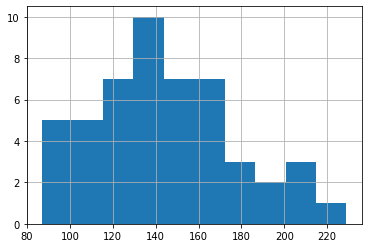

In [24]:
movies_df['Duration'].hist()